## Introduction:
This Python script performs a linear regression analysis on housing data to predict housing prices based on various features.

## Importing required libraries
- The script imports necessary libraries including pandas, numpy, matplotlib, and scikit-learn for data manipulation, visualization, and modeling.
- Sets the display format for floating-point numbers.

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt

pd.options.display.float_format = '{:,.8f}'.format

## Data Preparation
- Reads housing data from a CSV file and displays it.

In [34]:
data = pd.read_csv('.//Housing-3.csv')
display(data)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


- Checks for null values and finds none.

In [35]:
data.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

There are zero null values

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


- Sets specific columns as categorical data types and encodes binary categorical variables ('Yes' to 1, 'No' to 0).

In [37]:
columns_to_convert = [
    'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
    'prefarea', 'furnishingstatus'
]
data[columns_to_convert] = data[columns_to_convert].astype('str')

for col in columns_to_convert:
    if (col != 'furnishingstatus'):
        # Map 'Yes' to 1 and 'No' to 0
        data[col] = data[col].map({'yes': 1, 'no': 0})

## Exploratory Data Analysis
- Calculates and displays the correlation matrix between price and other features.
- Highlights moderate positive correlations between price and area, bathrooms, and air conditioning.

In [38]:
corr_matrix = data[[
    'price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
    'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking',
    'prefarea'
]].corr()

display(corr_matrix['price'].sort_values(ascending=False))

price             1.00000000
area              0.53599735
bathrooms         0.51754534
airconditioning   0.45295408
stories           0.42071237
parking           0.38439365
bedrooms          0.36649403
prefarea          0.32977705
mainroad          0.29689849
guestroom         0.25551729
basement          0.18705660
hotwaterheating   0.09307284
Name: price, dtype: float64

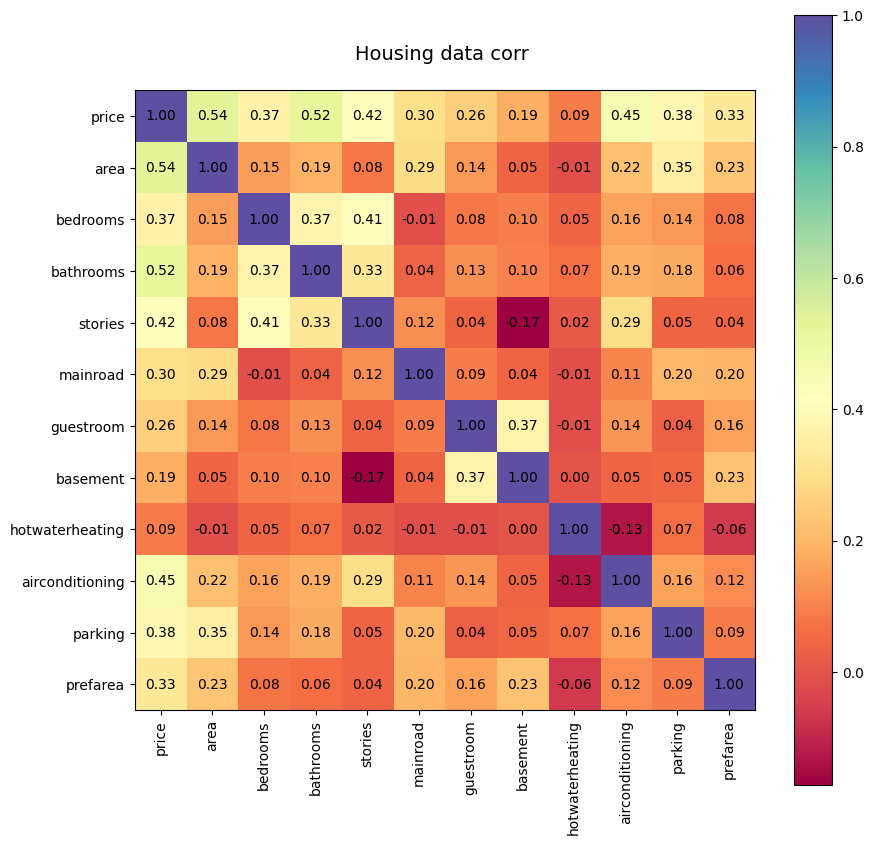

In [39]:
plt.imshow(corr_matrix, cmap="Spectral")
plt.colorbar()
plt.gcf().set_size_inches(10, 10)
plt.xticks(range(len(corr_matrix.columns)),
           corr_matrix.columns,
           rotation='vertical')
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)

labels = corr_matrix.values
for a in range(labels.shape[0]):
    for b in range(labels.shape[1]):
        plt.text(a,
                 b,
                 '{:.2f}'.format(labels[b, a]),
                 ha='center',
                 va='center',
                 color='black')
plt.title('Housing data corr \n', fontsize=14)
plt.show()

**The correlation between price and area is 0.536.**

This indicates a moderate positive correlation between the price of a property and its area. In other words, as the area of the property increases, the price tends to increase as well, and vice versa.

**The correlation between price and the number of bathrooms is 0.518.**

This also suggests a moderate positive correlation between the price of a property and the number of bathrooms it has. Typically, properties with more bathrooms tend to have higher prices, and properties with fewer bathrooms tend to have lower prices.

**The correlation between price and air conditioning is 0.453.**

This indicates a moderate positive correlation between the presence of air conditioning in a property and its price. Properties with air conditioning tend to have higher prices compared to those without air conditioning.

## Linear Regression Modeling
- Splits the data into training and testing sets (80% training, 20% testing).
- Creates a linear regression model and trains it on the training data.
- Makes predictions on the testing data and evaluates the model's performance using Mean Squared Error and R-squared.

In [40]:
# Split the data into training and testing sets (80% training, 20% testing)
X = data[['area']]
y = data[['price']]

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

# Create and train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')

Mean Squared Error: 3675286604768.19
R-squared: 0.27


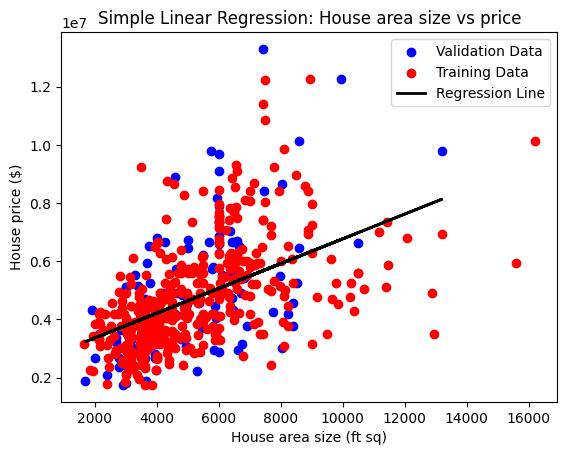

In [41]:
# Plot the regression line and data points
plt.scatter(X_test, y_test, color='blue', label='Validation Data')
plt.scatter(X_train, y_train, color='Red', label='Training Data')
plt.plot(X_test, y_pred, color='black', label='Regression Line', linewidth=2)
plt.xlabel('House area size (ft sq)')
plt.ylabel('House price ($)')
plt.legend()
plt.title('Simple Linear Regression: House area size vs price')
plt.show()

# Linear Regression Model Evaluation

## Mean Squared Error (MSE)

- **Value:** 3,675,286,604,768.19

The Mean Squared Error (MSE) of the linear regression model is approximately 3.68 trillion. This suggests that, on average, the squared difference between the predicted values and the actual values is quite high, indicating a notable level of error in the model's predictions.

## R-squared (R²)

- **Value:** 0.27

The R-squared (R²) value of approximately 0.27 indicates that around 27% of the variance in the dependent variable (target) can be explained by the independent variables (features) used in the model. While this suggests some level of predictive power, the model's explanatory capability is modest, leaving room for improvement.

### Conclusion

Based on the evaluation results, the linear regression model demonstrates relatively poor performance, with a notable level of error in its predictions. While it exhibits some predictive capability, further refinement or the inclusion of additional relevant features may be necessary to enhance its performance.


**Testing whether scaling data can improve predictions in linear regression is a valid hypothesis to explore, especially if you suspect that the scales of different features in your dataset might affect the performance of the model.**

## Scaled Model Evaluation
- Builds a scaled linear regression model using scaled input features and target variable.
- Evaluates the performance of the scaled model using Mean Squared Error and R-squared.


In [42]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

# Scale the input features and target variable
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).ravel()
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1)).ravel()

# Initialize linear regression models
lr_unscaled = LinearRegression()
lr_scaled = LinearRegression()

# Train models on unscaled and scaled data
lr_unscaled.fit(X_train, y_train)
lr_scaled.fit(X_train_scaled, y_train_scaled)

# Make predictions
y_pred_unscaled = lr_unscaled.predict(X_test)
y_pred_scaled = lr_scaled.predict(X_test_scaled)
# y_pred_scaled = scaler_y.inverse_transform(y_pred_scaled.reshape(-1,1)).ravel()

# Evaluate models
mse_unscaled = mean_squared_error(y_test, y_pred_unscaled)
mse_scaled = mean_squared_error(y_test, y_pred_scaled)

mae_unscaled = mean_absolute_error(y_test, y_pred_unscaled)
mae_scaled = mean_absolute_error(y_test, y_pred_scaled)

print(f"Mean Squared Error (Unscaled): {mse_unscaled:.2f}")
print(f"Mean Squared Error (Scaled): {mse_scaled:.2f}")

print(f"Root Mean Squared Error (Unscaled): {np.sqrt(mse_unscaled):.2f}")
print(f"Root Mean Squared Error (Scaled): {np.sqrt(mse_scaled):.2f}")

print(f"Mean Absolute Error (MAE) (Unscaled): {mae_unscaled:.2f}")
print(f"Mean Absolute Error (MAE) (Scaled): {mae_scaled:.2f}")

print(f'R-squared (Unscaled): {r2_score(y_test, y_pred_unscaled):.6f}')
print(f'R-squared (Scaled): {r2_score(y_test_scaled, y_pred_scaled):.6f}')


Mean Squared Error (Unscaled): 3675286604768.19
Mean Squared Error (Scaled): 30129992800137.33
Root Mean Squared Error (Unscaled): 1917103.70
Root Mean Squared Error (Scaled): 5489079.41
Mean Absolute Error (MAE) (Unscaled): 1474748.13
Mean Absolute Error (MAE) (Scaled): 5007536.70
R-squared (Unscaled): 0.272879
R-squared (Scaled): 0.272879


# Model Evaluation Results

The mean squared error (MSE) for the unscaled model is 3,675,286,604,768.19, while for the scaled model, it is 30,129,992,800,137.33. The MSE for the scaled model is significantly higher than that of the unscaled model, indicating that the scaled model's predictions have a larger average squared difference from the actual values compared to the unscaled model.

The root mean squared error (RMSE) for the unscaled model is approximately 1,917,103.70, whereas for the scaled model, it is approximately 5,489,079.41. This suggests that the average deviation of predicted prices from actual prices is higher in the scaled model compared to the unscaled model.

The mean absolute error (MAE) for the unscaled model is approximately 1,474,748.13, while for the scaled model, it is approximately 5,007,536.70. The MAE measures the average absolute difference between the predicted and actual prices, and the values further confirm that the scaled model's predictions deviate more from the actual prices compared to the unscaled model.

Both the unscaled and scaled models have an R-squared value of approximately 0.27. This indicates that around 27.29% of the variance in the dependent variable (target) can be explained by the independent variables (features) included in both models.

In conclusion, while scaling the features did not have a noticeable impact on the R-squared value, it led to a significant increase in the mean squared error, root mean squared error, and mean absolute error. This suggests that scaling did not improve the model's predictive performance and may have even worsened it.


# Multiple Linear Regression & Model Evaluation

**Below steps are already completed above**
- Import necessary libraries
- Load the dataset
- Data Exploration and Preprocessing

### Convert categorical variables to numeric using one-hot encoding

In [43]:
binary_columns = [
    'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
    'prefarea'
]

for col in binary_columns:
    data[col] = data[col].map({1: True, 0: False})

display(data.head(10))

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,True,False,False,False,True,2,True,furnished
1,12250000,8960,4,4,4,True,False,False,False,True,3,False,furnished
2,12250000,9960,3,2,2,True,False,True,False,False,2,True,semi-furnished
3,12215000,7500,4,2,2,True,False,True,False,True,3,True,furnished
4,11410000,7420,4,1,2,True,True,True,False,True,2,False,furnished
5,10850000,7500,3,3,1,True,False,True,False,True,2,True,semi-furnished
6,10150000,8580,4,3,4,True,False,False,False,True,2,True,semi-furnished
7,10150000,16200,5,3,2,True,False,False,False,False,0,False,unfurnished
8,9870000,8100,4,1,2,True,True,True,False,True,2,True,furnished
9,9800000,5750,3,2,4,True,True,False,False,True,1,True,unfurnished


In [44]:
data = pd.get_dummies(data,
                         columns=['furnishingstatus'],
                         drop_first=True)
display(data.head(10))

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,True,False,False,False,True,2,True,False,False
1,12250000,8960,4,4,4,True,False,False,False,True,3,False,False,False
2,12250000,9960,3,2,2,True,False,True,False,False,2,True,True,False
3,12215000,7500,4,2,2,True,False,True,False,True,3,True,False,False
4,11410000,7420,4,1,2,True,True,True,False,True,2,False,False,False
5,10850000,7500,3,3,1,True,False,True,False,True,2,True,True,False
6,10150000,8580,4,3,4,True,False,False,False,True,2,True,True,False
7,10150000,16200,5,3,2,True,False,False,False,False,0,False,False,True
8,9870000,8100,4,1,2,True,True,True,False,True,2,True,False,False
9,9800000,5750,3,2,4,True,True,False,False,True,1,True,False,True


# Define the target and input features

In [45]:
predictive_variables = [
    'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom',
    'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea',
    'furnishingstatus_semi-furnished', 'furnishingstatus_unfurnished'
]

X = data[predictive_variables]
Y = data['price']

# Data Splitting

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression Modeling

In [47]:
# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

# Model Evaluation

In [48]:
# Make predictions on the testing data
y_pred = model.predict(X_test)

In [49]:
# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)

# Calculate R-squared (R2) Score
r2 = r2_score(y_test, y_pred)
print("R-squared (R2) Score:", r2)

Mean Squared Error (MSE): 1754318687330.6633
Root Mean Squared Error (RMSE): 1324506.9600914384
Mean Absolute Error (MAE): 970043.4039201637
R-squared (R2) Score: 0.6529242642153185


# Interpretation

In [50]:
# Print the coefficients (slopes) for each feature to understand their impact on the house price
coefficients = model.coef_
intercept = model.intercept_

print("Coefficients (Slopes):")
for feature, coef in zip(X.columns, coefficients[0]):
    print(f"{feature}: {coef.round(2)}")

print(f"Intercept: {intercept.round(2)}")

Coefficients (Slopes):
area: 235.97
bedrooms: 76778.7
bathrooms: 1094444.79
stories: 407476.59
mainroad: 367919.95
guestroom: 231610.04
basement: 390251.18
hotwaterheating: 684649.89
airconditioning: 791426.74
parking: 224841.91
prefarea: 629890.57
furnishingstatus_semi-furnished: -126881.82
furnishingstatus_unfurnished: -413645.06
Intercept: [260032.36]


# Linear Regression Model Results

## Coefficients (Slopes)

- **Area:** Each unit increase in area is associated with an increase in price by approximately 235.97.
- **Bedrooms:** Each additional bedroom contributes approximately 76,778.70 to the price.
- **Bathrooms:** Each additional bathroom adds approximately 1,094,444.79 to the price.
- **Stories:** Each additional story increases the price by approximately 407,476.59.
- **Mainroad:** Properties located on the main road have a premium of approximately 367,919.95.
- **Guestroom:** Properties with a guest room have an increase in price by approximately 231,610.04.
- **Basement:** Houses with a basement are associated with an increase in price by approximately 390,251.18.
- **Hotwaterheating:** Properties with hot water heating systems have an additional value of approximately 684,649.89.
- **Airconditioning:** Houses with air conditioning systems command an increase in price by approximately 791,426.74.
- **Parking:** Each additional parking spot adds approximately 224,841.91 to the price.
- **Prefarea:** Properties in preferred areas have a premium of approximately 629,890.57.
- **Furnishingstatus_semi-furnished:** Semi-furnished properties have a negative impact on price, reducing it by approximately 126,881.82.
- **Furnishingstatus_unfurnished:** Unfurnished properties have a negative impact on price, reducing it by approximately 413,645.06.

## Intercept

- The intercept suggests that the baseline price of a property, with all other features set to zero, is approximately $260,032.36.

## Evaluation Metrics

- **Mean Squared Error (MSE):** The average squared difference between the predicted and actual prices is approximately 1,754,318,687,330.66.
- **Root Mean Squared Error (RMSE):** The RMSE is approximately 1,324,506.96, indicating the average deviation of predicted prices from actual prices.
- **Mean Absolute Error (MAE):** The average absolute difference between the predicted and actual prices is approximately 970,043.40.
- **R-squared (R2) Score:** The R-squared value of approximately 0.65 suggests that around 65.29% of the variance in the house prices can be explained by the independent variables included in the model.

## Inference

- The model seems to have captured some of the important factors influencing house prices, as indicated by the significant coefficients and the moderately high R-squared value.
- Features such as bathrooms, air conditioning, and Prefarea appear to have the highest impact on house prices.
- However, the relatively high MSE, RMSE, and MAE suggest that there is still room for improvement in the model's predictive accuracy. Further refinement or the inclusion of additional relevant features may enhance the model's performance.
